## 6.1 여러가지 확률 분포

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 6.1.6 이항분포 (Binomial distribution)
**이항분포** 는 성공확률이 $p$ 면서 $N$ 회의 독립 베르누이 시행을 했을 때 성공한 횟수 $m$ 이 따르는 이상형 확률분포이다.
- 이항분포의 모수(파라미터)는 성공확률 $p$ 와 시행횟수 $N$ 이다.
- scipy.stats 에서 확률질량함수 **pmf** (Probability Mass Function) 파라미터는 성공횟수, 시행횟수, 성공확률

In [2]:
# 앞이 나올 확률이 50%인 동전을 2번 던져서 그중 1번 앞면일 확률을 계산.
stats.binom.pmf(k=1, n=2, p=0.5)

0.5000000000000002

In [3]:
# rvs 함수로 이항 분포를 따르는 난수 생성, 성공률 20%, 시행 10, 성공수를 세는 시행 5회
np.random.seed(1)
stats.binom.rvs(n=10, p=0.2, size=5)

array([2, 3, 0, 1, 1])

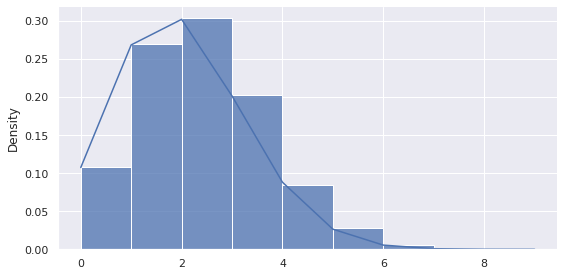

In [4]:
# N=10, p=0.2 인 이항분포
binomial = stats.binom(n=10, p=0.2)
# 난수 생성
np.random.seed(1)
rvs_binomial = binomial.rvs(size=10000)
# 확률밀도함수
m = np.arange(0, 10, 1)
pmf_binomial = binomial.pmf(k=m)
# 난수의 히스토그램과 확률질량함수를 겹쳐서 그리기
sns.displot(rvs_binomial, bins=m, stat='density', height=4, aspect=2)
plt.plot(m, pmf_binomial);

정규분포와는 달리 좌우비대칭 히스토그램이다.

### 6.1.7 푸아송 분포
- **푸아송 분포** 는 1개 또는 2개, 1회 또는 2회 등의 **카운트 데이터** 가 따라는 이상형 확률분포이다.
- 카운트 데이터의 특징 $\rightarrow $ 0 이상의 정수
- 푸아송 분포의 모수는 강도(일이 일어날 횟수에 대한 기댓값, 발생 강도) $\lambda$ 밖에 없다.
- 푸아송 분포를 따르는 확률변수는 기댓값과 분산도 $\lambda$ 값고 같다.

### 6.1.8 푸아송 분포의 사용
- 예
 - 낚시대를 바꾸면 잡는 물고기 수가 달라지는지
 - 주변 환경에 따라 조사 구획내의 생물의 개체수가 변하는지
 - 날씨에 따라 상품 판매 개수가 얼마나 달라지는지...
 
### 6.1.9 푸아송 분포의 확률질량함수
$x$ 는 카운트 데이터 등의 이산형 확률변수이고, $\lambda$ 는 푸아송 분포의 강도이다.\
### Pois$(x|\lambda) = \frac{e^{-\lambda}\lambda^{x}}{x!}$

### 6.1.10 이항분포와 푸아송 분포의 관계
- 푸아송 분포는 $p \rightarrow 0, N \rightarrow \infty$ 라는 조건에서 이항분포가 $Np = \lambda$ 인 결과라고 볼 수 있다.
- 풀어쓰면 '*성공확률이 한없이 0에 가깝지만 시행횟수가 무한히 많은 이항분포*' 이다.
- 일어나기 어려운 사건($p \rightarrow 0$) 이지만 샘플이 굉장히 많을때($N\rightarrow\infty$) 의 발생건수가 푸아송분포를 따르는 것이 된다.

### 6.1.11 푸아송 분포
stats.poisson.pmf 로 푸아송 분포의 확률질량함수를 얻을 수 있다.

In [5]:
# 강도가 5인 푸아송 분포에서 어떤값(k) 2를 얻을 확률
stats.poisson.pmf(k=2, mu=5)

0.08422433748856832

In [6]:
# 푸아송 분포를 따르는 난수 생성
np.random.seed(1)
stats.poisson.rvs(mu=2, size=5)

array([2, 1, 0, 1, 2])

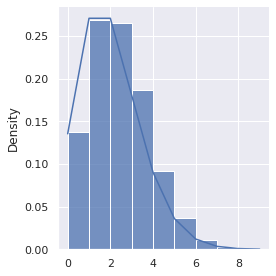

In [7]:
# 람다(기대값) = 2인 푸아송 분포
poisson = stats.poisson(mu=2)
# 난수
np.random.seed(1)
rvs_poisson = poisson.rvs(size=10000)
# 확률질량함수
pmf_poisson = poisson.pmf(k=m)
# 난수의 히스토그램과 확률질량함수
sns.displot(rvs_poisson, bins=m, stat='density', height=4)
plt.plot(m, pmf_poisson);

푸아송 분포와 이항분포의 관계 확인.\
시행횟수를 100000000회, 성공확률을 0.00000002로 한 이항분포의 확률질량함수를 강도 2인 푸아송 분포의 확률질량함수와 비교.

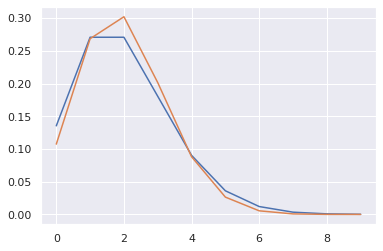

In [8]:
# N 이 크고 p 가 작은 이항분포
N = 100000000
p = 0.00000002
binomial_2 = stats.binom(n=N, p=p)
# 확률질량함수
pmf_binomial_2 = binomial.pmf(k=m)
# 확률질량함수 그래프
plt.plot(m, pmf_poisson)
plt.plot(m, pmf_binomial_2);

결과는 거의 비슷하다는 것

### 6.1.12 그 외의 확률분포
- **음이항분포**
 - 푸아송분포처럼 카운트 데이터가 따르는 확률분포
 - 푸아송분포보다 분산이 크다.
 - 샘플의 분산이 푸아송 분포로는 상정 할 수 없이 큰경우, 이문제를 **과분산** 이라하며, 이때 음이항분포를 사용하면 잘 모델링되기도 한다.

- **감마분포**
 - 0 이상의 값을 취하는 연속형 확률변수가 따르는 확률분포.
 - 정규분포와 달리 0 이상의 값만 취하며, 분산값도 평균값에 따라 변한다. (*등분산이 아님*)